In [6]:
import pandas as pd
import random
from backend_build import now_time
pd.set_option('display.max_rows', 8)


Create qubits_info and gates_info

In [7]:
n_qubits = 32

qubits_info = pd.DataFrame(columns=['T1','T1_date', 
                                    'T2','T2_date', 
                                    'frequency', 'frequency_date', 
                                    'readout_error', 'readout_error_date', 
                                    'prob_meas0_prep1','prob_meas0_prep1_date', 
                                    'prob_meas1_prep0', 'prob_meas1_prep0_date', 
                                    'readout_length', 'readout_length_date'])
for i in range(n_qubits):
    qubits_info.loc[i] = [abs(random.gauss(50e3, 1e3)), now_time(), # T1
                         abs(random.gauss(1000, 50)), now_time(),   # T2
                         abs(random.gauss(1, 0.05)), now_time(),    # frequency
                         abs(random.gauss(0.0005, 0.0001)), now_time(), # readout_error
                         abs(random.gauss(0.0005, 0.0001)), now_time(), # prob_0_1
                         abs(random.gauss(0.0005, 0.0001)), now_time(), # prob_1_0
                         abs(random.gauss(0.1, 0.01)), now_time(),] # readout_length

gates_info = pd.DataFrame(columns=['qubits',
                                   'gate',
                                   'gate_error', 'error_date',
                                   'gate_length', 'length_date',
                                   'name'])
iter = -1
for gate in ['id', 'r' ,'rz']:
    for j in range(n_qubits):
        iter += 1
        gates_info.loc[iter] = ['['+str(j)+']',
                                gate,
                                abs(random.gauss(0.0015, 0.0002)), now_time(), # 1qb gate error
                                random.gauss(150, 10), now_time(),
                                gate+str(j)]
for gate in ['rzz']:
    for i in range(n_qubits):
        for j in list(range(i))+list(range(i+1,n_qubits)):
            if abs(j-i) < 3:
                error_2qb = abs(random.gauss(0.0045, 0.0005)) # 2qb gate error (|j-i|=1)
            elif abs(j-i) < 7:
                error_2qb = abs(random.gauss(0.01, 0.002)) # 2qb gate error (|j-i|=2,3,4)
            else:
                continue
            iter += 1
            gates_info.loc[iter] = ['['+str(i)+','+str(j)+']',
                                    gate,
                                    error_2qb, now_time(), # 2qb gate error
                                    abs(random.gauss(150, 10)), now_time(),
                                    gate+str(i)+'_'+str(j)]
    


display(qubits_info)
display(gates_info)

,T1,T1_date,T2,T2_date,frequency,frequency_date,readout_error,readout_error_date,prob_meas0_prep1,prob_meas0_prep1_date,prob_meas1_prep0,prob_meas1_prep0_date,readout_length,readout_length_date
0,49645.671037,2023-12-27T10:32+08:00,1029.700819,2023-12-27T10:32+08:00,0.995001,2023-12-27T10:32+08:00,0.000594,2023-12-27T10:32+08:00,0.000352,2023-12-27T10:32+08:00,0.000605,2023-12-27T10:32+08:00,0.102784,2023-12-27T10:32+08:00
1,49658.558306,2023-12-27T10:32+08:00,913.107970,2023-12-27T10:32+08:00,1.015576,2023-12-27T10:32+08:00,0.000548,2023-12-27T10:32+08:00,0.000558,2023-12-27T10:32+08:00,0.000694,2023-12-27T10:32+08:00,0.104999,2023-12-27T10:32+08:00
2,50793.178759,2023-12-27T10:32+08:00,949.019644,2023-12-27T10:32+08:00,0.992390,2023-12-27T10:32+08:00,0.000476,2023-12-27T10:32+08:00,0.000469,2023-12-27T10:32+08:00,0.000511,2023-12-27T10:32+08:00,0.097256,2023-12-27T10:32+08:00
3,50838.566232,2023-12-27T10:32+08:00,973.367113,2023-12-27T10:32+08:00,1.033090,2023-12-27T10:32+08:00,0.000369,2023-12-27T10:32+08:00,0.000576,2023-12-27T10:32+08:00,0.000619,2023-12-27T10:32+08:00,0.115652,2023-12-27T10:32+08:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,49235.175000,2023-12-27T10:32+08:00,1036.197028,2023-12-27T10:32+08:00,1.006235,2023-12-27T10:32+08:00,0.000354,2023-12-27T10:32+08:00,0.000543,2023-12-27T10:32+08:00,0.000379,2023-12-27T10:32+08:00,0.088648,2023-12-27T10:32+08:00
29,49996.700180,2023-12-27T10:32+08:00,1117.302492,2023-12-27T10:32+08:00,1.059445,2023-12-27T10:32+08:00,0.000454,2023-12-27T10:32+08:00,0.000304,2023-12-27T10:32+08:00,0.000487,2023-12-27T10:32+08:00,0.110341,2023-12-27T10:32+08:00
30,49903.819411,2023-12-27T10:32+08:00,999.227328,2023-12-27T10:32+08:00,0.998179,2023-12-27T10:32+08:00,0.000515,2023-12-27T10:32+08:00,0.000352,2023-12-27T10:32+08:00,0.000469,2023-12-27T10:32+08:00,0.084763,2023-12-27T10:32+08:00
31,48631.601503,2023-12-27T10:32+08:00,1056.219492,2023-12-27T10:32+08:00,1.009154,2023-12-27T10:32+08:00,0.000624,2023-12-27T10:32+08:00,0.000485,2023-12-27T10:32+08:00,0.000486,2023-12-27T10:32+08:00,0.104680,2023-12-27T10:32+08:00


,qubits,gate,gate_error,error_date,gate_length,length_date,name
0,[0],id,0.001407,2023-12-27T10:32+08:00,145.496008,2023-12-27T10:32+08:00,id0
1,[1],id,0.001453,2023-12-27T10:32+08:00,151.982921,2023-12-27T10:32+08:00,id1
2,[2],id,0.001293,2023-12-27T10:32+08:00,150.893277,2023-12-27T10:32+08:00,id2
3,[3],id,0.001775,2023-12-27T10:32+08:00,155.343047,2023-12-27T10:32+08:00,id3
...,...,...,...,...,...,...,...
434,"[31,27]",cz,0.008535,2023-12-27T10:32+08:00,136.060734,2023-12-27T10:32+08:00,cz31_27
435,"[31,28]",cz,0.009372,2023-12-27T10:32+08:00,155.133391,2023-12-27T10:32+08:00,cz31_28
436,"[31,29]",cz,0.004324,2023-12-27T10:32+08:00,144.112013,2023-12-27T10:32+08:00,cz31_29
437,"[31,30]",cz,0.004904,2023-12-27T10:32+08:00,176.040331,2023-12-27T10:32+08:00,cz31_30


Save the files

In [ ]:
qubits_file = 'qubits_data_{}.csv'.format(n_qubits)
gates_file = 'gates_data_{}.csv'.format(n_qubits)

with open(qubits_file, 'w') as f:
    qubits_info.to_csv(f, index=False, lineterminator='\n')
with open(gates_file, 'w') as f:
    gates_info.to_csv(f, index=False, lineterminator='\n')


Plot the error distribution

(array([ 6., 23., 32., 18., 13.,  3.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  3.,  5.,  6.,  8., 10., 15., 14., 13., 13., 13.,
         6., 10.,  3.,  5.,  0.,  1.,  1.,  3.,  0.,  2.,  2.,  0.,  0.,
         0.,  0.,  1.,  2.,  3.,  2.,  6.,  5.,  4.,  2.,  3.,  8.,  8.,
         5.,  7.,  3.,  6., 11.,  4.,  5.,  8.,  3.,  6.,  8.,  2.,  5.,
        10., 10.,  3.,  7.,  7.,  7.,  5.,  3.,  9.,  1.,  2.,  7.,  3.,
         5.,  3.,  2.,  0.,  2.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.00106506, 0.00121224, 0.00135942, 0.00150661, 0.00165379,
        0.00180097, 0.00194815, 0.00209534, 0.00224252, 0.0023897 ,
        0.00253688, 0.00268407, 0.00283125, 0.00297843, 0.00312561,
        0.00327279, 0.00341998, 0.00356716, 0.00371434, 0.00386152,
        0.00400871, 0.00415589, 0.00430307, 0.00445025, 0.00459744,
        0.00474462, 0.0048918 , 0.00503898, 0.00518617, 0.00533335,
        0.00548053, 0.0056

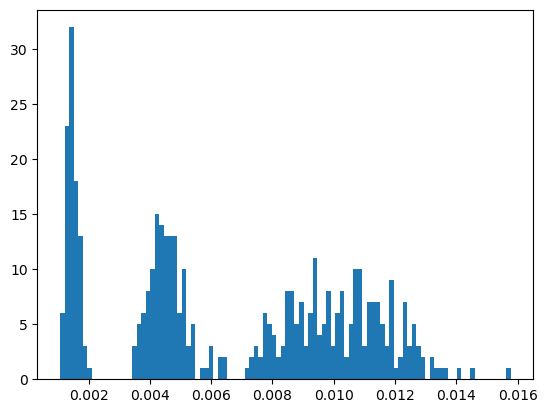

In [15]:
import matplotlib.pyplot as plt

# plt.plot( gates_info["gate_error"], '.' )

plt.hist( gates_info["gate_error"], bins=100 )